# Factors Affecting Freedom and Democracy of Countries by EDA LLC.


Our project is inspired by the Freedom of the World 2022 report by the Freedom House organization, which conducts research and advocacy on democracy, political freedom, and human rights and highlights the ongoing deterioration of democratic institutions around the world.
The goal of our project is to analyze the decline of countries considered 'Free' and democratic. In addition, based on different social and political factors, we want to propose a classification model to determine how democratic a government is and which direction it is likely to follow.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import alldataAndAggregate as v
import educationFactorEDA as ed
import PovertyEDA as pe
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")

### Datasets
Three of the datsets we used are from the Freedom of the World report https://freedomhouse.org/report/freedom-world. These include:
 - Aggregate scores for different measures like Civil Liberties, Political Rights and freedom status from 2016 - 2022 [Aggregate_Category_and_Subcategory_Scores_FIW_2003-2022.xlsx]
 - Election Vulnerability Data 2020-2022 based on most recent election [Election_Vulnerability_Index_downloadable_data 1.28.22.xlsx]
 - Freedom status of countries/territories from 2013-2021  [All_data_FIW_2013-2022.xlsx]
 
In addition, we incorporated data about countries' poverty index and literacy rates:
 - Adult Literacy and Development Rate of Countries 2018 - 2021 [Literacy-rate_2021-1.xlsx] (https://data.unicef.org/topic/education/overview/)
 - Global Multidimensional Poverty Index Data 2007- 2018 [Multidimensional Poverty Index__.xls] http://data.un.org/DocumentData.aspx?id=421

### Data Cleaning
The listed datatsets were almost close to perfect and required very little cleaning, however the protocol we have followed in order to provide any analysis or classification is:
1. Drop the columns filled with NA's
2. Drop unnamed columns which don't have any data
3. Rename useful column names which are unnamed to that present in the dataset
4. Drop the first row as it has column names for calculations
5. Reset the index of the dataframe for readability
6. Clean missing values
7. Extracted needed features to perform Machine Learning

### Visualizations

#### [V1] Average Total Aggregate Score by Region
The total aggregation score contains different individual scores such as electoral and political processes, and freedom of expression and belief of that country or territory. As well as rule of law, personal autonomy, and individuals rights. As you can see on the graph, the countries that are in Eurasia and Middle East have the lowest average total aggregate scores which means that they lack in all these individual scores making it more authoritarian or having less freedom.

In [22]:
v.readAggregateVis().head(3)

,Total
Region,
Africa,43.727466
Americas,75.097360
Asia,57.623803


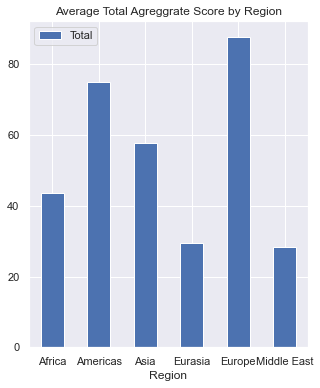

In [23]:
v.aggregateVis()

#### [V2] Freedom status of countries from 2013 to 2022
Each year Freedom House assign a freedom status to each country based on the combination of overall scores for political
rights and for civil liberties.
Though the number of Free countries is greater than Not Free and Partly Free, it is on the decline since 2013.
While the number of countries categorized as Not Free has been increasing steadily from 2017 to 2020 and significantly jumped from 2020 to the present.
It worth noting the relationship between the number of Not Free and Partly Free countries that seem to go opposite of each other. This can suggest that the number of Not Free countries is mostly dependent on Partly Free countries and how well they are able to solidify their democratic institutions
This brings the question, which factors help solidify or undermine a democracy?

In [20]:
# Read records for countries' status for each year and group by year and status to show the counts for each group
v.readFreedomStatuses().head(3)  # This is just an example of the first rows of resulting dataframe

,year,status,count
0,2013,F,92
1,2013,NF,54
2,2013,PF,63


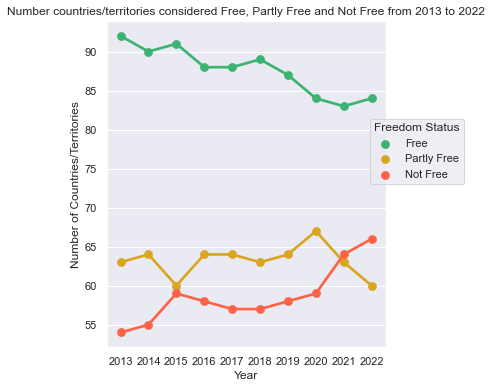

In [36]:
v.alldataVis() # Resulting Visualization, conclusions detailed above

#### [V3] Literacy Rate Factor

Finding the type of relationship literacy rate has with the development rate and status of the country. After exploring the datasets, it seemed to be plausible to make the inference that the factor literacy rate has direct relationship with both of them. As lower the literacy rate, higher the number of Less Developed Countries as well as higher number of Not Free/Partially Free countries.
This led to find out the relation of the development rate and status of the regions for the year 2018. Looking at the barchart, it can be seen that there are higher numbers of Not Free and Partially Free countries in Less/Least Developed Regions than in More Developed Regions.

In [24]:
ed.display_allData()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,Total,ISO3,Region_UNICEF,Sub-region,Development Regions,Total_LiteracyRate,Time period
1,Afghanistan,Asia,c,2018,NF,5,6,26,AFG,SA,SA,Least Developed,65.420547,2018
2,Albania,Europe,c,2018,PF,3,3,68,ALB,ECA,EECA,More Developed,99.330002,2018
3,Algeria,Africa,c,2018,NF,6,5,35,DZA,MENA,MENA,Less Developed,97.426521,2018


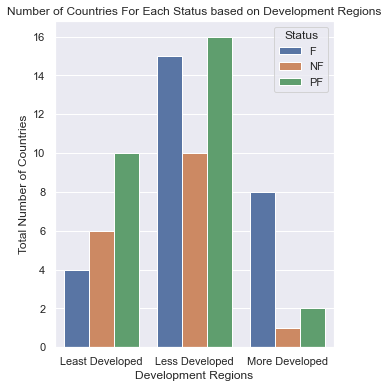

In [37]:
ed.regionPlot()

#### [V4] Multidimensional Poverty Index as a factor

Explores the the relationship between poverty and the freedom status of a country. The freedom status labels from the freedom status dataset were combined that with the poverty dataset till the year 2018. The EDA led to a conclusion that poverty does affect the freedom status as Not Free countries had the highest medians in population susceptible to poverty, popoulation in severe poverty and intensity of deprivtaion among the poor; followed by Partially Free countries. This trend is also seen in the graph below, free countries have the lowest median and shortest range for intensity of dperivation with a few outliers whereas Not Free and Partially Free have considerably large range of distribution.

In [26]:
pe.merged.head(3)

,Country,Year and survey,Index,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2017),Inequality among the poor,Population in severe multidimensional poverty,Population vulnerable to multidimensional poverty,Health,Education,Standard of living,National poverty line,PPP $1.90 a day,Status
0,Afghanistan,2015/2016 D,0.271721,55.910242,48.599550,19376.271484,19864.955078,0.020,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,NaN,NF
1,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.645042,20.615662,NaN,0.067062,5.040320,28.259981,55.054617,16.685401,14.3,1.1,PF
2,Algeria,2012/2013 M,0.008152,2.100729,38.806799,805.389282,867.982178,0.006,0.278065,5.836775,29.949945,46.842086,23.207971,5.5,0.5,NF


###### Intensity of deprivation represents how deprived a population is in the domain of Health, Education and Standard of Living.

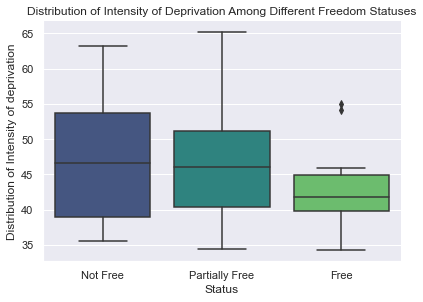

In [27]:
pe.vis2()

### Machine Learning Model

In [28]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#### [M1] Predicting whether a country is an electoral democracy or not based on factor such as Political Rights, Civil Liberties, Freedom of Expression.
Data is from a list of countries and a binary feature 'yes' or 'not' representing whether a countries election was considered democratic in 2022

In [29]:
dem = v.readListDem() # Dataset contains 195 countries and their electoral democracy designation in 2022
dem.head(3)

,country,dem_elec
0,Afghanistan,No
1,Albania,Yes
2,Algeria,No


In [30]:
# This dataset contains scores for different political and civil liberties factor for countries from 2013 to 2022
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)
countries_22 = df[df['Edition'] == 2022]  # Extract data for 2022 only since the electoral democracies data is only for 2022
countries_22 = countries_22.drop(['C/T', 'Edition', 'Total', 'Region', 'Add Q', 'Add A'], axis = 1)
countries_22.rename(columns = {'Country/Territory':'country'}, inplace = True)
# Merge scores for political and civil liberties factors to the approppriate country and electoral democracy designation for 2022
c_22 = countries_22.merge(dem[['country', 'dem_elec']], on = 'country', how = 'inner')
c_22.head(3)

,country,Status,PR rating,CL rating,A1,A2,A3,A,B1,B2,...,F3,F4,F,G1,G2,G3,G4,G,CL,dem_elec
0,Afghanistan,NF,7,6,0,0,0,0,0,0,...,0,0,0,0,1,0,1,2,9,No
1,Albania,PF,3,3,3,3,3,9,3,3,...,2,3,9,3,2,2,2,9,39,Yes
2,Algeria,NF,6,5,1,1,1,3,1,1,...,2,2,6,2,2,2,1,7,22,No


In [31]:
# The data above will divided into training and testing set and an SVM will run to create a model that can predict 
# the dem_elec features which is the electoral democracy designation.
X = c_22.iloc[:, 2:-1] # X festures are all except country, Status and dem_elec-what we are trying to predict
y = c_22.iloc[:, -1]   # y dem_elec-what we are trying to predict

X_train, X_test, y_train, y_test = train_test_split(X,y,  random_state = 1)
X_train = pd.DataFrame(X_train)
X_train = X_train.astype(float)

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### [M2] Predicting the freeness state of a country based on factors such as Political Rights, Civil Liberties, Freedom of Expression.

For the machine learning, we split the dataset to into seperate testing and training countries. Additionally, the training data is trained upto 2021 and the testing data makes predictions for the year 2022. We use the aggregrate scores for different categories such as Political Rights, Civil Liberties, Freedom of Expression as our features to train the dataset.

In [32]:
import machineLearning as ml
ml.predict_Baseline_Dummy()

Baseline Classifier Accuracy: 0.43169398907103823


Plots the training data on a map, to show the freeness state of the training countries

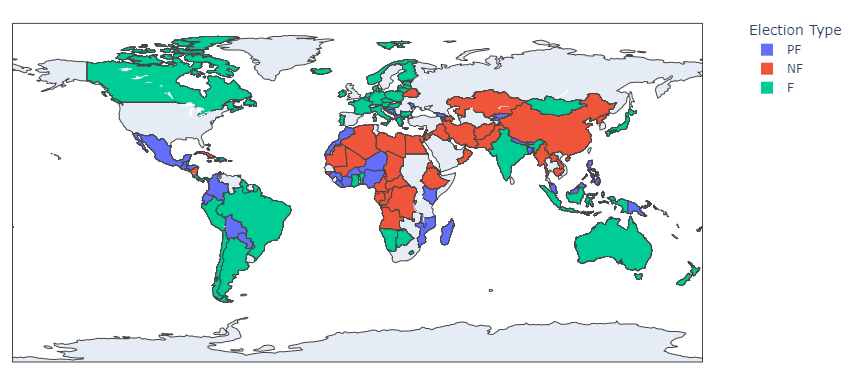

In [33]:
X_pred, y_pred = ml.predict_SVM()

SVM Accuracy: 0.9617486338797814


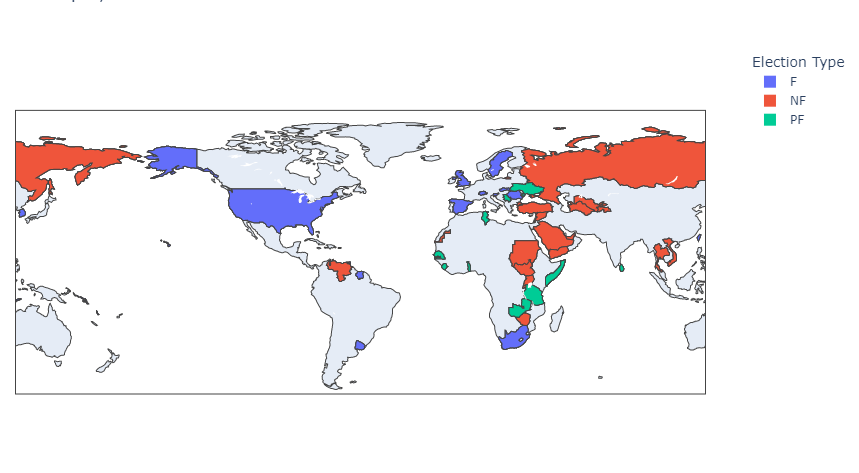

Plots the predictions of the the testing data on a map, to show the freeness state of the testing countries after using SVM Model with Linear Kernel

In [39]:
X_pred, y_pred = ml.predict_KNN()

KNN Accuracy: 0.9508196721311475


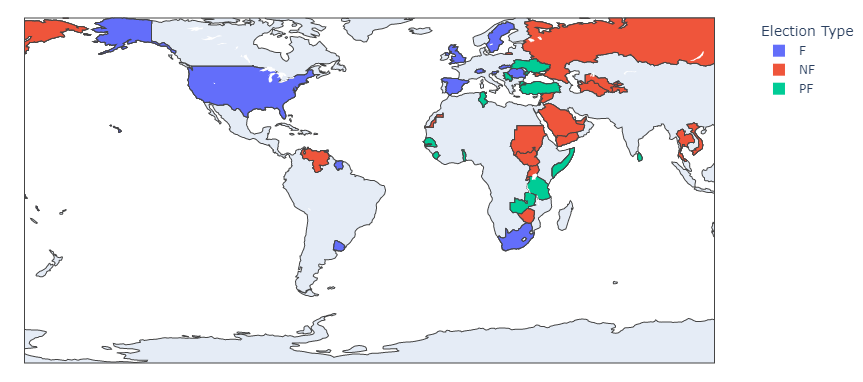

Plots the predictions of the testing data on a map, to show the freeness state of the testing countries after using KNN Model

### Results

With our initial exploration, we were able to see the factors that show trends and correlation with the freedom status. As we continue to analyze more models based on these factors and scores, we will be able to get precise factors that affect the freedom status.
PF institutions more vulnerable to attacks on democracy and freedom. Fluctuation of not free countries is mostly dependent on partly free countries and how well they are able to solidify their democratic institutions
The highest score is clearly Europe by a significant amount which shows that countries in Europe have more freedom than the rest of the world. 
Literacy Rate directly affects both factors, development region and the status of the countries. The number of countries with Not Free/ Partial Free status is more in Less Developed Regions / Least Developed Regions than in More Developed Regions.
Freeness of a country is dependent on the poverty of the country. Countries with a high poverty rate tend to be not free. It shows a clear relationship between the freedom of a country and how deprived the poor people are. Few outliers in free countries but the trend suggests that NF and PF countries are most deprived.
Further analysis of other factors related to the employment and the economy as well as different model, we will be able to determine more precisely how much each factor affects a country’s freedom status.